In [2]:
import sys
import os
sys.path.append(os.path.abspath("..")) 

In [3]:
import pandas as pd
from matcher.traditional import levenshtein_similarity
from matcher.fuzzy import fuzzy_ratio
from matcher.semantic import semantic_similarity
from tqdm import tqdm


c:\Repos\AI-StringMatching\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Repos\AI-StringMatching\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jakob\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to ac

In [ ]:

df = pd.read_csv("../data/quora_duplicate_questions.csv", sep=",").dropna()
sample = df.sample(100, random_state=42)

tqdm.pandas()
sample["levenshtein"] = sample.progress_apply(lambda x: levenshtein_similarity(str(x["question1"]), str(x["question2"])), axis=1)
sample["fuzzy"] = sample.progress_apply(lambda x: fuzzy_ratio(str(x["question1"]), str(x["question2"])), axis=1)
sample["semantic"] = sample.progress_apply(lambda x: semantic_similarity(str(x["question1"]), str(x["question2"])), axis=1)

100%|██████████| 100/100 [00:01<00:00, 72.48it/s]


,question1,question2,is_duplicate,levenshtein,fuzzy,semantic
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,0.882353,0.88,0.804451
224279,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,0.222222,0.33,0.455555
252452,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,0,0.279661,0.40,0.678740
174039,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,0,0.188976,0.30,0.088534
384863,What are some good books on marketing?,What are some of the best books ever written a...,1,0.540984,0.69,0.946184


### ROC Curve Analysis

The ROC curve below compares the classification performance of three string matching methods: Levenshtein Distance, Fuzzy Matching (FuzzyWuzzy), and Semantic Similarity (Sentence Transformers). Each curve plots the trade-off between true positive rate (TPR) and false positive rate (FPR) at various threshold settings.

- The **Area Under the Curve (AUC)** is a measure of the model's ability to distinguish between duplicate and non-duplicate questions.
- A higher AUC indicates better performance.
- A random guess would follow the diagonal line.

This helps identify which similarity method performs best at classifying question pairs in the Quora dataset.

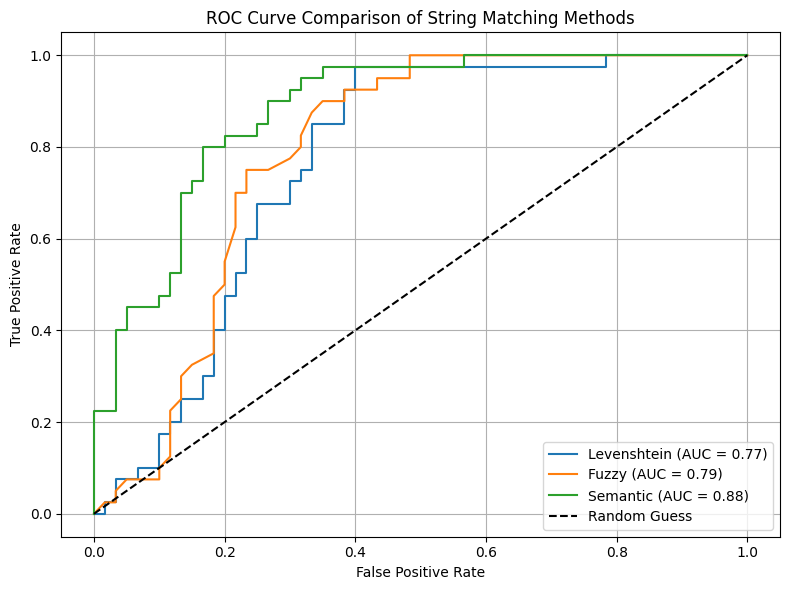

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for method in ["levenshtein", "fuzzy", "semantic"]:
    fpr, tpr, _ = roc_curve(sample["is_duplicate"], sample[method])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{method.capitalize()} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of String Matching Methods")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

